## OpenCV
# 이미지 연산

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
bob = cv2.imread('bob.jpg')

### numpy 연산

In [12]:
bob2 = bob + 100
bob2.max(), bob2.min()

(255, 0)

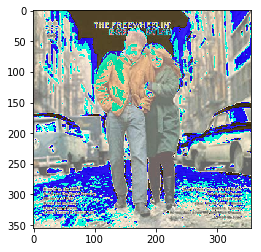

In [18]:
plt.imshow(bob2[:,:,[2,1,0]])

In [15]:
np.uint8([200]) + np.uint8([100])

array([44], dtype=uint8)

In [16]:
np.uint8([100]) - np.uint8([200])

array([156], dtype=uint8)

### OpenCV 연산
- cv2.add(), cv2.subtract(), cv2.multiply(), cv2.divide()
- 255 를 넘어가면 255으로, 0보다 작아지면 0으로 계산

In [30]:
bob2 = cv2.add(bob, np.zeros(bob.shape,dtype='uint8')+100)
bob2.max(), bob2.min()

(255, 100)

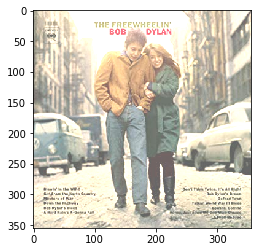

In [31]:
plt.imshow(bob2[:,:,[2,1,0]])

In [32]:
bob2 = cv2.multiply(bob, np.zeros(bob.shape,dtype='uint8')+2)
bob2.max(), bob2.min()

(255, 0)

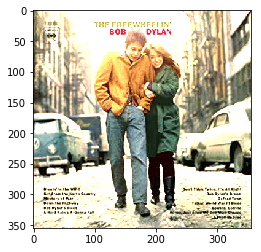

In [33]:
plt.imshow(bob2[:,:,[2,1,0]])

### 파이썬 비트연산
- AND(&), OR(|), NOT(~), XOR(^)
- np.bitwise_and(), ...

In [36]:
2 ^ 1

3

In [41]:
0b00001111 ^ 0b00000010

13

In [44]:
np.array([1,2,3]) ^ np.array([1,1,1])

array([0, 3, 2], dtype=int32)

In [45]:
type(0b00001111)

int

In [48]:
~0b0

-1

In [49]:
a = np.arange(9, dtype='uint8').reshape(3,3)
b = np.ones([3,3], dtype='uint8')

In [50]:
np.bitwise_and(a,b)

array([[0, 1, 0],
       [1, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [51]:
np.bitwise_or(a,b)

array([[1, 1, 3],
       [3, 5, 5],
       [7, 7, 9]], dtype=uint8)

In [52]:
np.bitwise_not(a)

array([[255, 254, 253],
       [252, 251, 250],
       [249, 248, 247]], dtype=uint8)

### 회색이미지로 변환

In [54]:
bob_gray = cv2.cvtColor(bob, cv2.COLOR_BGR2GRAY)

In [59]:
bob_gray.shape, bob_gray.max(), bob_gray.min()

((355, 355), 252, 0)

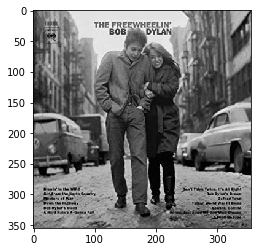

In [57]:
plt.imshow(bob_gray, cmap='gray')

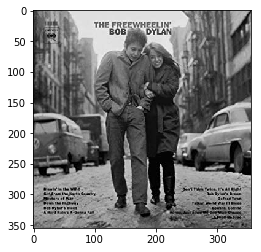

In [60]:
bob_gray2 = cv2.imread('bob.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(bob_gray2, cmap='gray')

### 마스크 생성

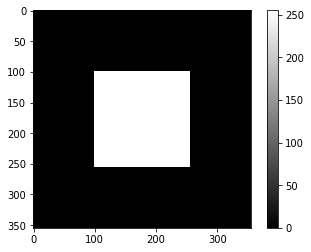

In [61]:
mask = np.zeros(bob_gray.shape, dtype='uint8')
cv2.rectangle(mask, (100,100), (255,255), 255, -1)

plt.imshow(mask, cmap='gray')
plt.colorbar()

### 마스크와의 비트연산

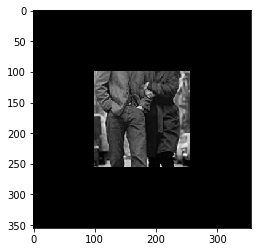

In [62]:
bob_masked = cv2.bitwise_and(bob_gray, mask)
plt.imshow(bob_masked, cmap='gray')

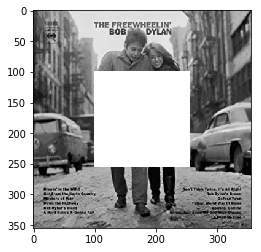

In [63]:
bob_masked = cv2.bitwise_or(bob_gray, mask)
plt.imshow(bob_masked, cmap='gray')

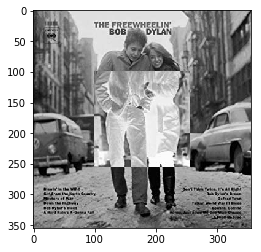

In [64]:
bob_masked = cv2.bitwise_xor(bob_gray, mask)
plt.imshow(bob_masked, cmap='gray')

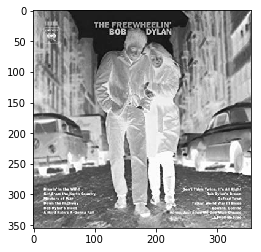

In [65]:
bob_masked = cv2.bitwise_not(bob_gray)
plt.imshow(bob_masked, cmap='gray')

### 비트연산시 mask 옵션 적용
- 마스크의 픽셀값이 0보다 큰 영역에서만 비트연산을 적용함

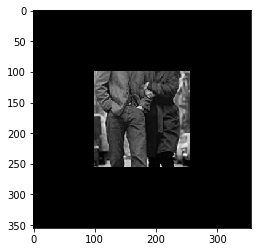

In [69]:
bob_masked = cv2.bitwise_and(bob_gray, bob_gray, mask=mask)
plt.imshow(bob_masked, cmap='gray')

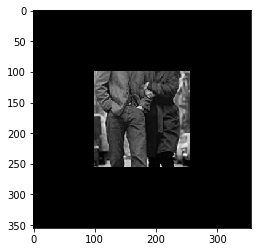

In [70]:
bob_masked = cv2.bitwise_or(bob_gray, bob_gray, mask=mask)
plt.imshow(bob_masked, cmap='gray')

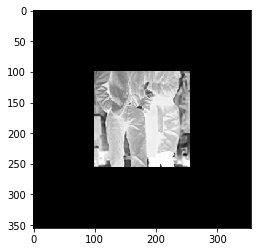

In [72]:
bob_masked = cv2.bitwise_not(bob_gray, mask=mask)
plt.imshow(bob_masked, cmap='gray')

- 칼러이미지에도 mask 옵션 적용 가능

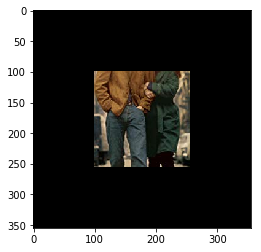

In [75]:
bob_masked = cv2.bitwise_and(bob, bob, mask=mask)
plt.imshow(bob_masked[:,:,[2,1,0]], cmap='gray')